# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: Weekly CDC Pneumonia Cases from Kaggle:

My dataset: https://www.kaggle.com/datasets/broach/weekly-cdc-pneumonia-cases

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv(r"C:\Users\16183\Desktop\LaunchCode\Pneumonia Data Set (CDC).csv") 

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
df.isna()

,Region,Count,ProbableCount,Week,Year,DateStr
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
39257,False,False,True,False,False,False
39258,False,False,True,False,False,False
39259,False,False,True,False,False,False
39260,False,False,True,False,False,False


<Axes: >

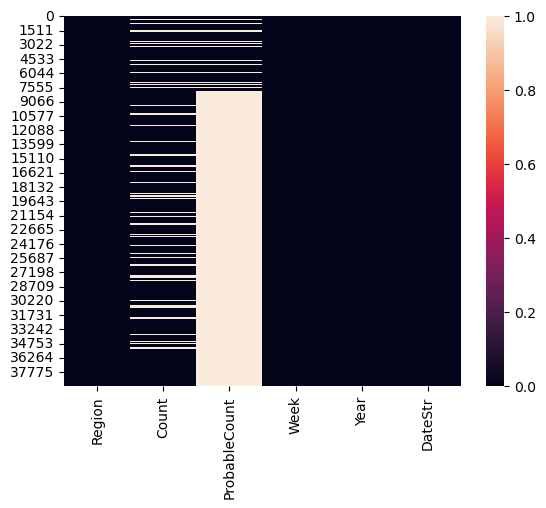

In [4]:
# Missing data heatmap
sb.heatmap(df.isnull())

In [5]:
# Null Rates by Column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

Region - 0%
Count - 14%
ProbableCount - 83%
Week - 0%
Year - 0%
DateStr - 0%


In [6]:
#C: Drop Column probable count with highest percent of missing data
df.drop('ProbableCount', axis=1, inplace = True)
df.head()

,Region,Count,Week,Year,DateStr
0,U.S. Residents excluding U.S. Territories,40.0,1,2021,09-Jan-2021
1,New England,2.0,1,2021,09-Jan-2021
2,Connecticut,0.0,1,2021,09-Jan-2021
3,Maine,0.0,1,2021,09-Jan-2021
4,Massachusetts,0.0,1,2021,09-Jan-2021


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

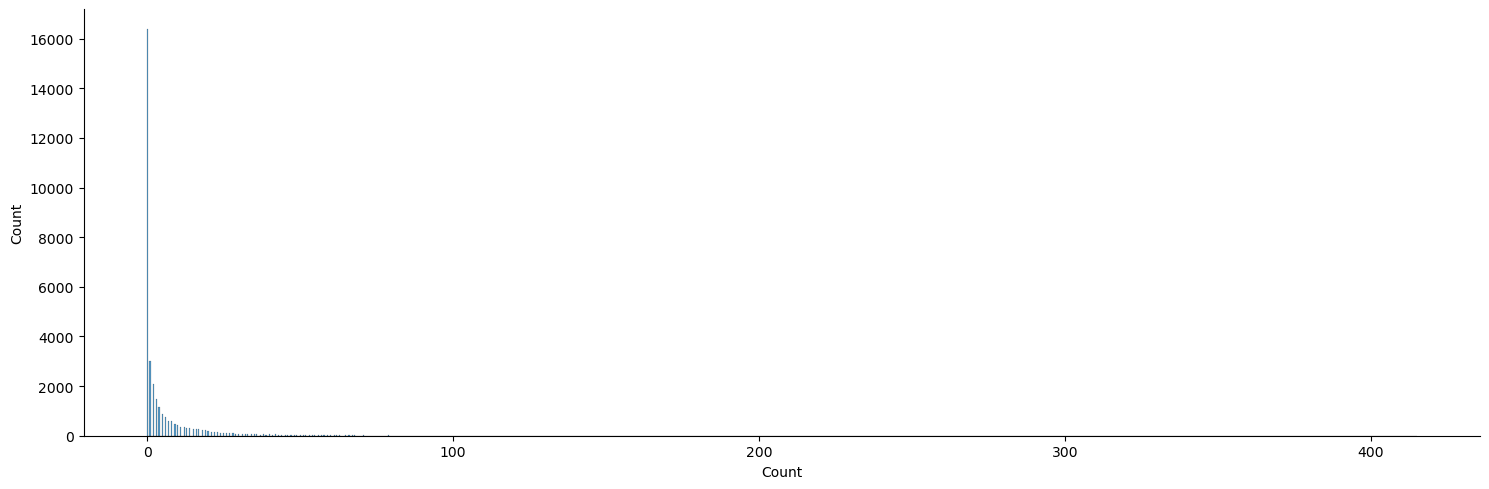

In [18]:
#Histograms
sb.displot(data=df, x='Count', height = 5, aspect = 3)

<Axes: >

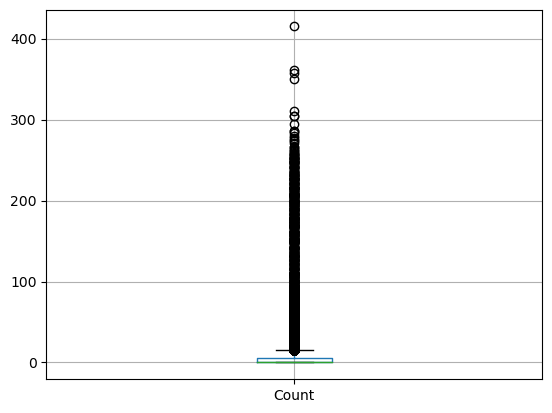

In [20]:
# Boxplots
df.boxplot(column=['Count'])

In [21]:
# Drop Outlier Rows > 350 for Count
indexNames = df[df['Count'] > 350].index
df.drop(indexNames, inplace=True)
df.nlargest(10, 'Count')

,Region,Count,Week,Year,DateStr
8107,United States,350.0,4,2018,27-Jan-2018
38927,UNITED STATES,310.0,48,2010,04-Dec-2010
15812,UNITED STATES,305.0,15,2016,16-Apr-2016
5159,U.S. Residents excluding U.S. Territories,304.0,12,2019,23-Mar-2019
7705,U.S. Residents excluding U.S. Territories,294.0,50,2019,14-Dec-2019
8308,United States,286.0,7,2018,17-Feb-2018
18358,UNITED STATES,286.0,1,2015,10-Jan-2015
15343,UNITED STATES,284.0,8,2016,27-Feb-2016
14874,UNITED STATES,280.0,1,2016,09-Jan-2016
36381,UNITED STATES,277.0,10,2010,13-Mar-2010


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
plt.bar(df['Region'], df['Count'])

plt.title("Rates of Pneumonia by Region (State and Territory)")

# Setting the X and Y labels
plt.xlabel('Region')
plt.ylabel('Rates of Pneumonia')
plt.show()

In [ ]:
#this above chart returned so much data. I decided to do a little bit of cleaning since I am focusing only on Missouri to isolate the bottom info to MO only

In [ ]:
#checked the Region data from above and found that I needed to keep both 'Missouri' and 'Mo.'
#drop all rows except where Region is equal to Missouri and Mo.
df_MOupdated = df.query("Region == 'Missouri' | Region == 'Mo.'")
plt.bar(df_MOupdated['Region'], df_MOupdated['Count'])

plt.title("Rates of Pneumonia in Missouri")

# Setting the X and Y labels
plt.xlabel('Region')
plt.ylabel('Rates of Pneumonia')
plt.show()

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [14]:
df['Region'].value_counts()
#too much data and inconsistent on measurements from some of the regions

Ohio                                         586
Hawaii                                       586
Idaho                                        586
Utah                                         586
Alaska                                       586
                                            ... 
East South Central                           170
West Virginia                                170
Massachusetts                                170
U.S. Residents excluding U.S. Territories    118
United States                                 52
Name: Region, Length: 127, dtype: int64

In [13]:
df_MOupdated = df.query("Region == 'Missouri' | Region == 'Mo.'")
df_MOupdated['Region'].value_counts()
#looks good for enough data entry for Missouri/MO entries

Mo.         416
Missouri    170
Name: Region, dtype: int64

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
Yes, there is so much data in my data set I had to narrow it down to one region, Missouri by removing unecessary data. Also had to clean up outliers/irregular data by removing counts above 350. I also removed the probable count column due to the highest amount of missing data/null values.

2. Did the process of cleaning your data give you new insights into your dataset?
Yes I reazlied that the probable count did not have the accuracy or enough data compared to the actual count column. I reazlied that most counts stayed below 350. 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

I don't think I reazlied how large of a data set this would be. I think it will take more practice to become comfortable with larger data sets of this size.